In [ ]:
#mount google drive
from google.colab import drive, files
drive.mount("/drive")

Mounted at /drive


In [ ]:
import io, json, librosa, soundfile, os, glob, pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:

upload = files.upload()
DEAP = pd.read_csv(io.StringIO(upload["video_list.csv"].decode("utf-8")))

Saving video_list.csv to video_list (1).csv


In [ ]:
DEAP['Lastfm_tag'].isnull().values.sum()

60

In [ ]:
DEAP.head()

,Online_id,Experiment_id,Lastfm_tag,Artist,Title,Youtube_link,Highlight_start,Num_ratings,VAQ_Estimate,VAQ_Online,...,AVG_Arousal,STD_Arousal,Q1_Arousal,Q2_Arousal,Q3_Arousal,AVG_Dominance,STD_Dominance,Q1_Dominance,Q2_Dominance,Q3_Dominance
0,1,NaN,happy,Alphabeat,Fascination,http://www.youtube.com/watch?v=QvD6maGRh7c,61,16,1,2,...,4.5625,2.3444,2.4167,4.5,7.0,5.2500,1.7139,5.0000,5.0,6.5833
1,2,1.0,fun,Emilíana Torrini,Jungle Drum,http://www.youtube.com/watch?v=iZ9vkd7Rp-g,81,14,1,1,...,5.8571,2.1993,4.0000,7.0,7.0,6.0000,1.5584,5.0000,6.0,7.0000
2,3,NaN,fun,The Go! Team,Huddle Formation,http://www.youtube.com/watch?v=X0eso4ARXzk,136,14,1,1,...,5.5714,2.0947,4.8333,6.0,7.0,5.5000,1.8420,5.0000,5.0,7.0000
3,4,NaN,fun,Junior Senior,Move Your Feet,http://www.youtube.com/watch?v=TjkQeBG8r_s,161,14,1,1,...,5.5000,2.2913,3.9167,6.0,8.0,5.0000,1.4142,4.9167,5.0,6.0000
4,5,NaN,fun,Of Montreal,Wraith Pinned To The Mist And Other Games,http://www.youtube.com/watch?v=7PoJv4N1Too,126,14,1,1,...,5.1429,1.4070,4.8333,5.0,6.0,4.9286,1.5336,4.9167,5.0,6.0000


In [ ]:
DEAP = DEAP.dropna(subset=['Lastfm_tag'])

DEAP.describe()

,Online_id,Experiment_id,Highlight_start,Num_ratings,VAQ_Estimate,VAQ_Online,AVG_Valence,STD_Valence,Q1_Valence,Q2_Valence,...,AVG_Arousal,STD_Arousal,Q1_Arousal,Q2_Arousal,Q3_Arousal,AVG_Dominance,STD_Dominance,Q1_Dominance,Q2_Dominance,Q3_Dominance
count,60.000000,17.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,30.500000,17.823529,105.750000,14.650000,2.500000,2.400000,5.257075,1.667218,2.950015,5.183333,...,4.558113,2.029812,2.950015,4.691667,6.099992,4.909397,1.878150,3.82362,5.033333,6.133325
std,17.464249,10.272751,77.039639,0.577106,1.127469,0.977718,0.978399,0.335744,1.295106,1.189526,...,0.993627,0.325101,1.295106,1.331151,1.108922,0.680998,0.299694,1.03631,0.817534,0.830107
min,1.000000,1.000000,6.000000,14.000000,1.000000,1.000000,3.333300,1.019800,1.000000,3.000000,...,2.400000,1.200000,1.000000,2.000000,3.000000,3.200000,1.319000,1.00000,3.000000,4.000000
25%,15.750000,12.000000,29.750000,14.000000,1.750000,2.000000,4.600000,1.442450,2.000000,4.375000,...,3.983325,1.859475,2.000000,4.000000,5.770825,4.575000,1.639100,3.00000,5.000000,5.833300
50%,30.500000,16.000000,106.000000,15.000000,2.500000,2.000000,5.133300,1.641200,3.000000,5.000000,...,4.414300,2.058050,3.000000,5.000000,6.000000,5.033350,1.876950,4.00000,5.000000,6.000000
75%,45.250000,25.000000,161.000000,15.000000,3.250000,3.000000,5.821425,1.846300,3.916700,6.000000,...,5.277400,2.304825,3.916700,6.000000,7.000000,5.357100,2.066975,4.91670,5.000000,7.000000
max,60.000000,33.000000,296.000000,16.000000,4.000000,4.000000,7.142900,2.561000,6.166700,7.500000,...,6.928600,2.691600,6.166700,7.500000,8.000000,6.142900,2.552600,5.00000,7.000000,7.083300


In [ ]:
DEAP.columns

Index(['Online_id', 'Experiment_id', 'Lastfm_tag', 'Artist', 'Title',
       'Youtube_link', 'Highlight_start', 'Num_ratings', 'VAQ_Estimate',
       'VAQ_Online', 'AVG_Valence', 'STD_Valence', 'Q1_Valence', 'Q2_Valence',
       'Q3_Valence', 'AVG_Arousal', 'STD_Arousal', 'Q1_Arousal', 'Q2_Arousal',
       'Q3_Arousal', 'AVG_Dominance', 'STD_Dominance', 'Q1_Dominance',
       'Q2_Dominance', 'Q3_Dominance'],
      dtype='object')

In [ ]:
DEAP['Lastfm_tag'].describe()

count        60
unique       31
top       happy
freq          5
Name: Lastfm_tag, dtype: object

In [ ]:
DEAP['Lastfm_tag'].value_counts()

happy          5
sentimental    4
fun            4
sad            4
pleasure       3
joy            3
exciting       2
hate           2
scary          2
angry          2
anger          2
melancholy     2
sexy           2
terror         2
calm           2
chill          2
passion        2
cheerful       2
horror         1
shock          1
terrible       1
sorrow         1
lovely         1
love           1
melancholic    1
mellow         1
depressing     1
ecstasy        1
adorable       1
relaxing       1
regret         1
Name: Lastfm_tag, dtype: int64

In [ ]:
#find match in MuSe dataset for ALL emotions in DEAP dataset

#look at arousal, valence and dominance for tracks in DEAP dataset (avg valence, dominance and arousal) and the MuSe dataset and try to use logistic regression or SVM to classify emotions
#emotion: target variable and arousal, valence, dominance: features
#do one hot encoding on the targets (emotions)
#do three cases: merge files together, just on MuSe dataset and just on DEAP dataset

In [ ]:
#find unique emotions in DEAP dataset
counter = 0
unique = []
for i in range(len(DEAP['Lastfm_tag'])):
  if DEAP['Lastfm_tag'][i] not in unique:
    unique.append(DEAP['Lastfm_tag'][i])
    counter += 1
print("unique values :",
      unique)
print('number of unique values in list :', counter)

#2 groups

#comfortable emotions: happy, fun, sexy, exciting, pleasure, adorable,
#joy, passion, cheerful, chill, calm, relaxing, love, sentimental,
#lovely, ecstasy

#uncomfortable emotions: sad, melancholy, regret, depressing, mellow,
#melancholic, anger, angry, scary, sorrow, terrible, hate, shock,
#horror, terror


#4 groups

#happy: happy, exciting, joy, love, lovely, fun, sexy, pleasure, adorable, passion, cheerful, ecstasy
#calm: chill, calm, relaxing, sentimental, mellow
#sad: sad, regrest, depressing,  melancholic, sorrow
#angry: anger, angry, terrible, hate, shock, horror, terror



unique values : ['happy', 'fun', 'sexy', 'exciting', 'pleasure', 'adorable', 'joy', 'passion', 'cheerful', 'chill', 'calm', 'relaxing', 'love', 'sentimental', 'lovely', 'sad', 'melancholy', 'regret', 'ecstasy', 'depressing', 'mellow', 'melancholic', 'anger', 'angry', 'scary', 'sorrow', 'terrible', 'hate', 'shock', 'horror', 'terror', nan]
number of unique values in list : 32


In [ ]:
comfortable = ['happy', 'fun', 'sexy', 'exciting', 'pleasure', 'adorable',
'joy', 'passion', 'cheerful', 'chill', 'calm', 'relaxing', 'love', 'sentimental',
'lovely', 'ecstasy']

uncomfortable = ['sad', 'melancholy', 'regret', 'depressing', 'mellow',
'melancholic', 'anger', 'angry', 'scary', 'sorrow', 'terrible', 'hate', 'shock',
'horror', 'terror']

In [ ]:
#import muse dataset

upload = files.upload()
muse = pd.read_csv(io.StringIO(upload["muse_v3.csv"].decode("utf-8")))

Saving muse_v3.csv to muse_v3.csv


In [ ]:
muse

,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre
0,https://www.last.fm/music/eminem/_/%2527till%2...,'Till I Collapse,Eminem,['aggressive'],6,4.550000,5.273125,5.690625,cab93def-26c5-4fb0-bedd-26ec4c1619e1,4xkOaSrkexMciUUogZKVTS,rap
1,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,['aggressive'],8,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,3fOc9x06lKJBhz435mInlH,metal
2,https://www.last.fm/music/rick%2bross/_/speedi...,Speedin',Rick Ross,['aggressive'],1,3.080000,5.870000,5.490000,NaN,3Y96xd4Ce0J47dcalLrEC8,rap
3,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,"['aggressive', 'fun', 'sexy', 'energetic']",13,6.555071,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,6tqFC1DIOphJkCwrjVzPmg,hip-hop
4,https://www.last.fm/music/dope/_/die%2bmf%2bdie,Die MF Die,Dope,['aggressive'],7,3.771176,5.348235,5.441765,b9eb3484-5e0e-4690-ab5a-ca91937032a5,5bU4KX47KqtDKKaLM4QCzh,metal
...,...,...,...,...,...,...,...,...,...,...,...
89996,https://www.last.fm/music/gaby%2bhoffmann%2b%2...,Battle,Gaby Hoffmann & Jay Duplass,['transparent'],1,5.370000,3.450000,5.330000,NaN,NaN,NaN
89997,https://www.last.fm/music/omar%2brodriguez-lop...,Hands Tied to the Roots of a Hemorrhage,Omar Rodriguez-Lopez,['transparent'],4,5.797887,4.132254,5.570563,NaN,NaN,progressive rock
89998,https://www.last.fm/music/ace%2bwhite/_/crookf...,Crookfield Zoo,Ace White,['transparent'],1,5.370000,3.450000,5.330000,NaN,NaN,NaN
89999,https://www.last.fm/music/second%2bchyld/_/tra...,Transparent (Full Version),Second Chyld,['transparent'],1,5.370000,3.450000,5.330000,NaN,NaN,NaN


In [ ]:
muse['seeds'] = muse['seeds'].str.strip('['']')

muse['seeds'] = muse['seeds'].str.strip("''")
muse.head()

<ipython-input-17-795d0938fad0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muse['seeds'] = muse['seeds'].str.strip('['']')
<ipython-input-17-795d0938fad0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muse['seeds'] = muse['seeds'].str.strip("''")


,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre
0,https://www.last.fm/music/eminem/_/%2527till%2...,'Till I Collapse,Eminem,aggressive,6,4.550000,5.273125,5.690625,cab93def-26c5-4fb0-bedd-26ec4c1619e1,4xkOaSrkexMciUUogZKVTS,rap
1,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,aggressive,8,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,3fOc9x06lKJBhz435mInlH,metal
3,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,"aggressive', 'fun', 'sexy', 'energetic",13,6.555071,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,6tqFC1DIOphJkCwrjVzPmg,hip-hop
4,https://www.last.fm/music/dope/_/die%2bmf%2bdie,Die MF Die,Dope,aggressive,7,3.771176,5.348235,5.441765,b9eb3484-5e0e-4690-ab5a-ca91937032a5,5bU4KX47KqtDKKaLM4QCzh,metal
5,https://www.last.fm/music/drowning%2bpool/_/st...,Step Up,Drowning Pool,aggressive,9,2.971389,5.537500,4.726389,49e7b4d2-3772-4301-ba25-3cc46ceb342e,4Q1w4Ryyi8KNxxaFlOQClK,metal


In [ ]:
muse = muse.dropna()
mu = muse['seeds'].to_list()


deap = DEAP['Lastfm_tag'].to_list()



mask = muse["seeds"].str.fullmatch("|".join(DEAP['Lastfm_tag']))

muse2 = muse[mask]
muse2


,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre
1000,https://www.last.fm/music/drowning%2bpool/_/bo...,Bodies,Drowning Pool,angry,5,3.154091,5.293182,4.260000,6fc464e2-c422-48a0-8a26-4fe13f376231,7CpbhqKUedOIrcvc94p60Y,metal
1001,https://www.last.fm/music/limp%2bbizkit/_/brea...,Break Stuff,Limp Bizkit,angry,7,3.282162,5.999189,4.696486,79f7764d-01a5-4ff0-b85e-c54957c1ddc4,5cZqsjVs6MevCnAkasbEOX,nu metal
1002,https://www.last.fm/music/rage%2bagainst%2bthe...,Bullet in the Head,Rage Against the Machine,angry,3,2.515714,6.334286,4.230952,7ab3b7d4-5a33-4478-aaa0-50cb6bdfc652,1WWgMk8nD79p8VeKFGYrOw,rock
1003,https://www.last.fm/music/eminem/_/the%2bway%2...,The Way I Am,Eminem,angry,10,3.247333,5.664889,4.566667,384b7388-e626-459a-a14e-aae81e61bc61,23wfXwnsPZYe5A1xXRHb3J,rap
1004,https://www.last.fm/music/alanis%2bmorissette/...,You Oughta Know,Alanis Morissette,angry,13,3.608361,5.482295,4.427049,8e25b4da-cd53-45d8-9c86-aa0d72d8b5ce,3jS7bB0oXVOwGFZn3aE5NV,rock
...,...,...,...,...,...,...,...,...,...,...,...
88706,https://www.last.fm/music/air/_/space%2bmaker,Space Maker,Air,mellow,15,5.961316,3.377105,5.755921,7f163407-47a3-4610-8f96-34f9b63bc0cc,0jCeocEAgVyglk0fY6urTr,electronic
88707,https://www.last.fm/music/marc%2bcohn/_/walkin...,Walking In Memphis,Marc Cohn,mellow,15,5.780000,3.479524,6.032698,b42180de-4715-4df4-a4f8-14952e15020c,5fgkjhICZnqFctrV0AyuQD,rock
88708,https://www.last.fm/music/modest%2bmouse/_/lives,Lives,Modest Mouse,mellow,13,5.382785,3.827342,5.215063,489f45bd-354b-4fd1-8182-4b96495c4d29,2oe4wyycSHGBXGIaY4Fll5,indie
88709,https://www.last.fm/music/ben%2bhoward/_/promise,Promise,Ben Howard,mellow,8,6.950000,3.011111,6.452222,555330c2-a395-40ff-a360-b5e1317ca03f,4qyfir5Yr7nfo05g6cyFMT,acoustic


In [ ]:
for i in comfortable:
  muse2.loc[muse2["seeds"].str.contains(i), "emotion_category"] = int(1)
  DEAP.loc[DEAP["Lastfm_tag"].str.contains(i), "emotion_category"] = int(1)
for i in uncomfortable:
  muse2.loc[muse2["seeds"].str.contains(i), "emotion_category"] = int(0)
  DEAP.loc[DEAP["Lastfm_tag"].str.contains(i), "emotion_category"] = int(0)
#DEAP['emotion_category'].value_counts()
#muse2.head()

1.0    36
0.0    24
Name: emotion_category, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

DEAP_filter = DEAP[['AVG_Valence', 'AVG_Dominance', 'AVG_Arousal', 'emotion_category']].rename(columns={'AVG_Valence':'valence_tags', 'AVG_Dominance':'dominance_tags', 'AVG_Arousal': 'arousal_tags'})
arr_scaled = scaler.fit_transform(DEAP_filter)
DEAP_scaled = pd.DataFrame(arr_scaled, columns=DEAP_filter.columns,index=DEAP_filter.index)
DEAP_scaled

In [ ]:
muse_filter = muse2[['valence_tags','arousal_tags','dominance_tags','emotion_category']]
array_scaled = scaler.fit_transform(muse_filter)
muse_scaled = pd.DataFrame(array_scaled, columns=muse_filter.columns,index=muse_filter.index)
muse_scaled

,valence_tags,arousal_tags,dominance_tags,emotion_category
1000,0.324535,0.729057,0.525373,0.0
1001,0.340808,0.844512,0.590520,0.0
1002,0.243420,0.899311,0.521038,0.0
1003,0.336383,0.789843,0.571144,0.0
1004,0.382257,0.759983,0.550306,0.0
...,...,...,...,...
88706,0.681235,0.415716,0.748645,0.0
88707,0.658196,0.432465,0.789955,0.0
88708,0.607724,0.489345,0.667920,0.0
88709,0.806861,0.355864,0.852570,0.0


In [ ]:
pd.options.display.max_rows = 4000
#muse2['seeds'].value_counts()
#DEAP['emotion_category'].value_counts()

1.0    36
0.0    24
Name: emotion_category, dtype: int64

In [ ]:
for i in comfortable:
  print(i, sum(i in s for s in muse2['seeds']))

happy 473
fun 466
sexy 559
exciting 180
pleasure 0
adorable 0
joy 0
passion 0
cheerful 381
chill 0
calm 376
relaxing 0
love 0
sentimental 433
lovely 0
ecstasy 0


In [ ]:
for i in uncomfortable:
  print(i, sum(i in s for s in muse2['seeds']))

sad 315
melancholy 265
regret 0
depressing 0
mellow 437
melancholic 0
anger 0
angry 531
scary 230
sorrow 0
terrible 0
hate 0
shock 0
horror 0
terror 0


In [ ]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler


In [ ]:
#select 80% of MuSe and 80% of DEAP and combine them
#need to do stratified sampling so take 80% of each emotion
'''
muse_sample = muse2.groupby('emotion_category', group_keys=False).apply(lambda x: x.sample(frac=0.8))
DEAP_sample = DEAP.groupby('emotion_category', group_keys=False).apply(lambda x: x.sample(frac=0.8))
'''



deap_train, deap_test = train_test_split(DEAP_scaled,test_size=0.2, stratify = DEAP_scaled['emotion_category'])
muse_train, muse_test = train_test_split(muse_scaled, test_size=0.2, stratify = muse_scaled['emotion_category'])
#muse_sample['emotion_category'].value_counts()
#deap_train['emotion_category'].value_counts()
deap_train.head()

#deap_train['emotion_category'].value_counts()
muse_test['emotion_category'].value_counts()

#muse_train['emotion_category'].value_counts()
#muse2['emotion_category'].value_counts()

1.0    574
0.0    356
Name: emotion_category, dtype: int64

In [ ]:
DEAP.describe()

,Online_id,Experiment_id,Highlight_start,Num_ratings,VAQ_Estimate,VAQ_Online,AVG_Valence,STD_Valence,Q1_Valence,Q2_Valence,...,STD_Arousal,Q1_Arousal,Q2_Arousal,Q3_Arousal,AVG_Dominance,STD_Dominance,Q1_Dominance,Q2_Dominance,Q3_Dominance,emotion_category
count,60.000000,17.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000
mean,30.500000,17.823529,105.750000,14.650000,2.500000,2.400000,5.257075,1.667218,2.950015,5.183333,...,2.029812,2.950015,4.691667,6.099992,4.909397,1.878150,3.82362,5.033333,6.133325,0.600000
std,17.464249,10.272751,77.039639,0.577106,1.127469,0.977718,0.978399,0.335744,1.295106,1.189526,...,0.325101,1.295106,1.331151,1.108922,0.680998,0.299694,1.03631,0.817534,0.830107,0.494032
min,1.000000,1.000000,6.000000,14.000000,1.000000,1.000000,3.333300,1.019800,1.000000,3.000000,...,1.200000,1.000000,2.000000,3.000000,3.200000,1.319000,1.00000,3.000000,4.000000,0.000000
25%,15.750000,12.000000,29.750000,14.000000,1.750000,2.000000,4.600000,1.442450,2.000000,4.375000,...,1.859475,2.000000,4.000000,5.770825,4.575000,1.639100,3.00000,5.000000,5.833300,0.000000
50%,30.500000,16.000000,106.000000,15.000000,2.500000,2.000000,5.133300,1.641200,3.000000,5.000000,...,2.058050,3.000000,5.000000,6.000000,5.033350,1.876950,4.00000,5.000000,6.000000,1.000000
75%,45.250000,25.000000,161.000000,15.000000,3.250000,3.000000,5.821425,1.846300,3.916700,6.000000,...,2.304825,3.916700,6.000000,7.000000,5.357100,2.066975,4.91670,5.000000,7.000000,1.000000
max,60.000000,33.000000,296.000000,16.000000,4.000000,4.000000,7.142900,2.561000,6.166700,7.500000,...,2.691600,6.166700,7.500000,8.000000,6.142900,2.552600,5.00000,7.000000,7.083300,1.000000


In [ ]:
#combine MuSE and DEAP training sets
#deap_training.head()
training = pd.concat([deap_train,
                     muse_train])


In [ ]:
training.describe()

,valence_tags,dominance_tags,arousal_tags,emotion_category
count,3764.000000,3764.000000,3764.000000,3764.000000
mean,0.680753,0.742103,0.628283,0.617163
std,0.215667,0.164389,0.197128,0.486144
min,0.000000,0.000000,0.000000,0.000000
25%,0.541050,0.632655,0.469610,0.000000
50%,0.720457,0.774063,0.645861,1.000000
75%,0.855603,0.865547,0.799213,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
training['emotion_category'].value_counts()

1.0    2323
0.0    1441
Name: emotion_category, dtype: int64

In [ ]:
train_sample = pd.concat([deap_test, muse_test])
train_sample.describe()

,valence_tags,dominance_tags,arousal_tags,emotion_category
count,942.000000,942.000000,942.000000,942.000000
mean,0.688179,0.747806,0.619542,0.616773
std,0.214508,0.163527,0.201828,0.486431
min,0.000000,0.000000,0.000000,0.000000
25%,0.549457,0.633535,0.470961,0.000000
50%,0.729409,0.780212,0.629977,1.000000
75%,0.862980,0.878336,0.791584,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
#deap_test = deap_test[['AVG_Valence', 'AVG_Dominance', 'AVG_Arousal', 'emotion_category']].rename(columns={'AVG_Valence':'valence_tags', 'AVG_Dominance':'dominance_tags', 'AVG_Arousal': 'arousal_tags'})
deap_test

,valence_tags,dominance_tags,arousal_tags,emotion_category
30,0.227504,0.249176,0.294418,1.0
17,0.629987,0.407761,0.323875,1.0
7,0.643742,0.732984,0.463719,1.0
21,0.606258,0.393184,0.258667,1.0
32,0.000000,0.000000,0.456366,0.0
35,0.472491,0.656937,0.588857,0.0
14,0.944981,0.883482,0.898004,1.0
56,0.192514,0.838187,0.677185,0.0
0,0.798430,0.696592,0.477521,1.0
10,0.577488,0.702266,0.603564,1.0


In [ ]:
muse_test = muse_test[['valence_tags' ,'dominance_tags','arousal_tags','emotion_category']]

In [ ]:
#performing logistic regression, SVM and neural network from Tensorflow

from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

log.fit(training.iloc[:,:-1], training['emotion_category'])

#predictions_deap = log.predict(deap_test.iloc[:,:-1])
#predictions_muse = log.predict(muse_test.iloc[:,:-1])

LogisticRegression()

0.8089798087141339
0.8333333333333334
0.8247311827956989
0.16666666666666666
0.17526881720430107


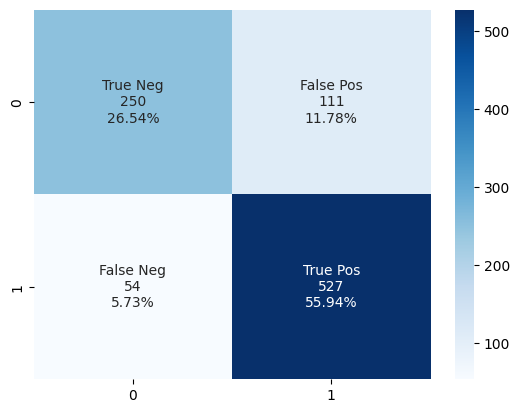

In [ ]:
from sklearn import metrics

y_train_pred = log.predict(training.iloc[:,:-1])
print(metrics.accuracy_score(training['emotion_category'], y_train_pred))

score = log.score(deap_test.iloc[:,:-1], deap_test['emotion_category'])
print(score)

score2 = log.score(muse_test.iloc[:,:-1], muse_test['emotion_category'])
print(score2)

#cf_matrix = confusion_matrix(train_sample.iloc[:,:-1], log.predict(train_sample.iloc[:,:-1]))
#sns.heatmap(cf_matrix, annot=True)

cf_matrix = confusion_matrix(train_sample['emotion_category'], log.predict(train_sample.iloc[:,:-1]))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

print(metrics.mean_squared_error(deap_test['emotion_category'], log.predict(deap_test.iloc[:,:-1])))
print(metrics.mean_squared_error(muse_test['emotion_category'], log.predict(muse_test.iloc[:,:-1])))

0.8116365568544102
0.8333333333333334
0.8236559139784946
0.1762208067940552


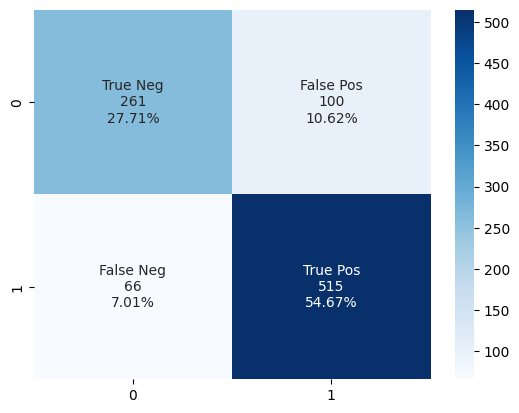

In [ ]:
#with SVM

from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(training.iloc[:,:-1], training['emotion_category'])
y_train_pred = clf.predict(training.iloc[:,:-1])
print(metrics.accuracy_score(training['emotion_category'], y_train_pred))

print(clf.score(deap_test.iloc[:,:-1], deap_test['emotion_category']))
print(clf.score(muse_test.iloc[:,:-1], muse_test['emotion_category']))
cf_matrix = confusion_matrix(train_sample['emotion_category'], clf.predict(train_sample.iloc[:,:-1]))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
print(metrics.mean_squared_error(train_sample['emotion_category'], clf.predict(train_sample.iloc[:,:-1])))

In [ ]:
#with neural network
import tensorflow as tf
model = tf.keras.models.Sequential([
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Flatten(input_shape=(5000,3)),
      tf.keras.layers.Dense(5000,activation='relu'), #add more nodes for relu activation and experiment with different activstion function
      tf.keras.layers.Softmax(),
      tf.keras.layers.Dense(2)
  ])
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), #look into other loss functions, MSE and other crossentropy functions, etc
                metrics=['accuracy']) #experiment with small learning rates
model.fit(training.iloc[:,:-1], training['emotion_category'],epochs=200)




In [ ]:
model.evaluate(deap_test.iloc[:,:-1], deap_test['emotion_category'], verbose=2)

1/1 - 0s - loss: 0.5800 - accuracy: 0.5833 - 141ms/epoch - 141ms/step


[0.5799655318260193, 0.5833333134651184]

In [ ]:
model.evaluate(muse_test.iloc[:,:-1], muse_test['emotion_category'], verbose=2)

30/30 - 0s - loss: 0.3182 - accuracy: 0.8301 - 87ms/epoch - 3ms/step


[0.31817615032196045, 0.8301075100898743]

In [ ]:
model.evaluate(train_sample.iloc[:,:-1], train_sample['emotion_category'], verbose=2)

30/30 - 0s - loss: 0.3215 - accuracy: 0.8270 - 92ms/epoch - 3ms/step


[0.32151100039482117, 0.8269639015197754]

30/30 [==============================] - 0s 9ms/step


<Axes: >

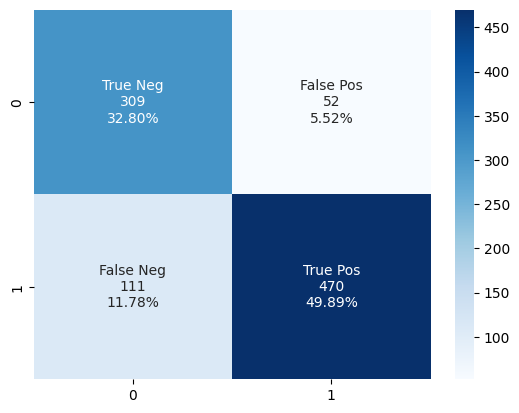

In [ ]:
cf_matrix = np.array(tf.math.confusion_matrix(train_sample['emotion_category'], model.predict(train_sample.iloc[:,:-1]).argmax(axis=1)))
#print(model.predict(train_sample.iloc[:,:-1]).argmax(axis=1))
#cf_matrix = confusion_matrix(train_sample['emotion_category'], clf.predict(train_sample.iloc[:,:-1]))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
mse = tf.keras.losses.MeanSquaredError()
print(mse(model.predict(train_sample.iloc[:,:-1]).argmax(axis=1), train_sample['emotion_category']).numpy())

30/30 [==============================] - 0s 4ms/step
0.173036093418259


In [ ]:
deap_train, deap_test = train_test_split(DEAP,test_size=0.2, stratify = DEAP['emotion_category'])
muse_train, muse_test = train_test_split(muse2, test_size=0.2, stratify = muse2['emotion_category'])
training = pd.concat([deap_train[['AVG_Valence', 'AVG_Dominance', 'AVG_Arousal', 'emotion_category']]
                     .rename(columns={'AVG_Valence':'valence_tags', 'AVG_Dominance':'dominance_tags', 'AVG_Arousal': 'arousal_tags'}),
                     muse_train[['valence_tags','arousal_tags','dominance_tags','emotion_category']]])

In [ ]:
training.head()

,valence_tags,dominance_tags,arousal_tags,emotion_category
5,5.6429,5.3571,5.0714,1.0
3,6.9286,5.0000,5.5000,1.0
31,4.4667,3.2667,4.0000,0.0
37,4.2143,5.5714,4.0000,1.0
24,5.2857,3.7143,4.0000,1.0


In [ ]:
###end of code